# Human field of view

In [35]:
from pathlib import Path

import numpy as np
import torch

from PIL import Image
import kornia as korn
import cv2

In [36]:
pl_im = Image.open("./mspacman_001975.png")

In [40]:
def th2pil(t):
    t = t.squeeze().permute(1, 2, 0) * 255
    return Image.fromarray(t.numpy().astype(np.uint8))

def np2pil(a):
    return Image.fromarray(a)

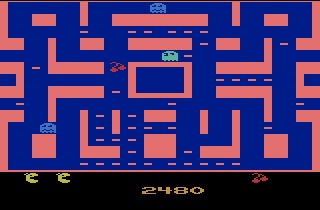

In [41]:
th_im = torch.from_numpy(np.array(pl_im)).permute(2, 0, 1) / 255
th2pil(th_im)

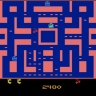

In [51]:
resize = korn.geometry.Resize((96, 96), antialias=True)
im96 = resize(th_im)
th2pil(im96)

In [56]:
th_im = th_im.to("cuda")

In [60]:
%timeit im96 = resize(th_im); torch.cuda.synchronize()

474 µs ± 4.24 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [61]:
%timeit cv2.resize(np.array(pl_im), (96,96), interpolation=cv2.INTER_AREA)

531 µs ± 3.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


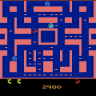

In [52]:
np2pil(cv2.resize(np.array(pl_im), (96,96), interpolation=cv2.INTER_AREA))

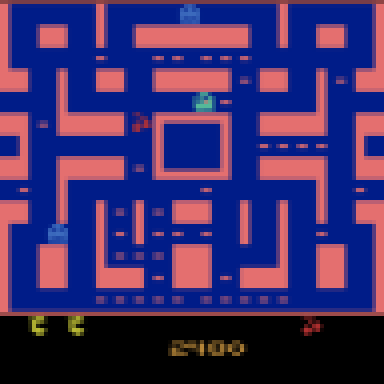

In [33]:
th2pil(korn.geometry.resize(im96, (96*4, 96*4), "nearest"))

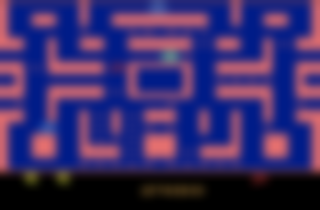

In [21]:
blur_im = korn.filters.gaussian_blur2d(th_im.unsqueeze(0), (21,21), (5, 5))
th2pil(blur_im)

In [8]:
def fov_mask(H=256, W=256):
    x_axis = np.linspace(-1, 1, H)[:, None]
    y_axis = np.linspace(-1, 1, W)[None, :]

    arr = np.sqrt(x_axis ** 2 + y_axis ** 2)
    arr = arr.clip(0, 1, arr)
    arr = (arr - arr.min()) / (arr.max() - arr.min())
    return 1 - arr

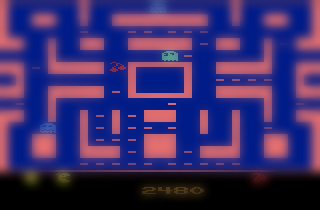

In [9]:
m = torch.from_numpy(fov_mask(210, 320))
fov_im = (th_im * m) + (blur_im * (1-m))
th2pil(fov_im)

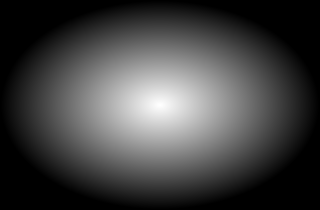

In [10]:
Image.fromarray((fov_mask(210, 320) * 255).astype(np.uint8))

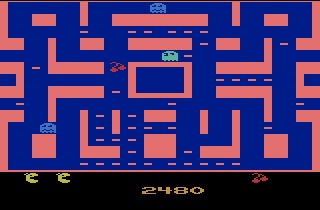

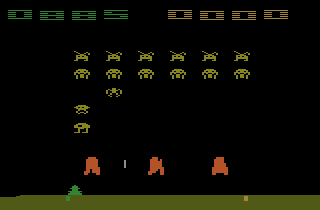

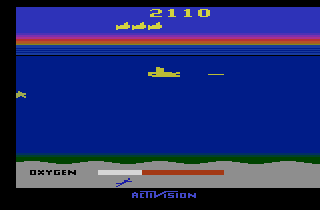

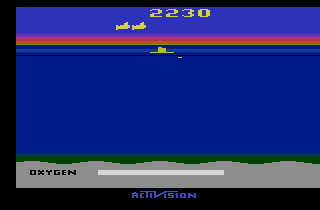

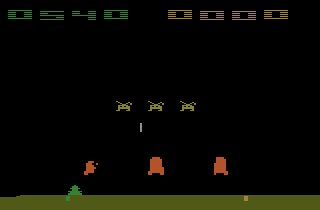

In [11]:
for p in Path.cwd().glob("**/*.png"):
    display(Image.open(p))